# Segmenting and Clustering Neigborhoods in Stuttgart

## Reading Stuttgart Districts

In [1]:
# imports
import pandas as pd
#Read Wikipedia Raw Dataframe
wiki_df = pd.read_html('https://de.wikipedia.org/wiki/Liste_der_Stadtbezirke_und_Stadtteile_von_Stuttgart')[2]
wiki_df.columns = ['Number','Name','People','Size','People/Size','Districts','NAN']
wiki_df.drop('NAN',axis=1,inplace=True)
wiki_df

,Number,Name,People,Size,People/Size,Districts
0,Innerer Stadtbezirk Nr. 1,Stuttgart-Mitte,23.956,3808,6.294,10
1,Innerer Stadtbezirk Nr. 2,Stuttgart-Nord,27.629,6815,4.054,11
2,Innerer Stadtbezirk Nr. 3,Stuttgart-Ost,48.730,9035,5.393,8
3,Innerer Stadtbezirk Nr. 4,Stuttgart-Süd,44.050,9586,4.594,7
4,Innerer Stadtbezirk Nr. 5,Stuttgart-West,52.668,18643,2.825,9
5,Äußerer Stadtbezirk Nr. 1,Bad Cannstatt,71.285,15713,4.537,18
6,Äußerer Stadtbezirk Nr. 2,Birkach,7.149,3089,2.383,3
7,Äußerer Stadtbezirk Nr. 3,Botnang,13.165,2135,6.166,4
8,Äußerer Stadtbezirk Nr. 4,Degerloch,16.686,8021,2.081,5
9,Äußerer Stadtbezirk Nr. 5,Feuerbach,30.417,11554,2.645,8


## Reading Stuttgart Districts Coordinates

In [2]:
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Stuttgart-Mitte'

geolocator = Nominatim(user_agent="ny_explorer")
mainlocation = geolocator.geocode(address)
latitude = mainlocation.latitude
longitude = mainlocation.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Stuttgart-Mitte are 48.7759, 9.1798.


In [3]:
coords = []
for index,row in wiki_df.iterrows():
    geolocator = Nominatim(user_agent="ny_explorer")
    name = row.Name if 'Stuttgart' in row.Name else 'Stuttgart, '+row.Name
    location = geolocator.geocode(name)
    latitude = location.latitude
    longitude = location.longitude
    coords.append({
        "Name":row.Name,
        "longitude":location.longitude,
        "latitude":location.latitude
    })
    print('The geograpical coordinate of {} are {}, {}.'.format(row.Name, latitude, longitude))    

The geograpical coordinate of Stuttgart-Mitte are 48.7759, 9.1798.
The geograpical coordinate of Stuttgart-Nord are 48.79666085, 9.176252469509578.
The geograpical coordinate of Stuttgart-Ost are 48.776972400000005, 9.207364812512658.
The geograpical coordinate of Stuttgart-Süd are 48.75302055, 9.132492195520019.
The geograpical coordinate of Stuttgart-West are 48.77765895, 9.151350803634184.
The geograpical coordinate of Bad Cannstatt are 48.8048828, 9.2146797.
The geograpical coordinate of Birkach are 48.728574449999996, 9.203405945716549.
The geograpical coordinate of Botnang are 48.778495, 9.1295324.
The geograpical coordinate of Degerloch are 48.749597, 9.1703452.
The geograpical coordinate of Feuerbach are 48.8123052, 9.1590308.
The geograpical coordinate of Hedelfingen are 48.756436, 9.2526651.
The geograpical coordinate of Möhringen are 48.7278158, 9.1477922.
The geograpical coordinate of Mühlhausen are 48.84561035, 9.226179019499073.
The geograpical coordinate of Münster are 4

In [4]:
coords_df = pd.DataFrame(coords)
coords_df

,Name,longitude,latitude
0,Stuttgart-Mitte,9.179800,48.775900
1,Stuttgart-Nord,9.176252,48.796661
2,Stuttgart-Ost,9.207365,48.776972
3,Stuttgart-Süd,9.132492,48.753021
4,Stuttgart-West,9.151351,48.777659
5,Bad Cannstatt,9.214680,48.804883
6,Birkach,9.203406,48.728574
7,Botnang,9.129532,48.778495
8,Degerloch,9.170345,48.749597
9,Feuerbach,9.159031,48.812305


## Merge District Data with Coordinates

In [5]:
merged_df = wiki_df.merge(right=coords_df,left_on='Name',right_on='Name')
merged_df

,Number,Name,People,Size,People/Size,Districts,longitude,latitude
0,Innerer Stadtbezirk Nr. 1,Stuttgart-Mitte,23.956,3808,6.294,10,9.179800,48.775900
1,Innerer Stadtbezirk Nr. 2,Stuttgart-Nord,27.629,6815,4.054,11,9.176252,48.796661
2,Innerer Stadtbezirk Nr. 3,Stuttgart-Ost,48.730,9035,5.393,8,9.207365,48.776972
3,Innerer Stadtbezirk Nr. 4,Stuttgart-Süd,44.050,9586,4.594,7,9.132492,48.753021
4,Innerer Stadtbezirk Nr. 5,Stuttgart-West,52.668,18643,2.825,9,9.151351,48.777659
5,Äußerer Stadtbezirk Nr. 1,Bad Cannstatt,71.285,15713,4.537,18,9.214680,48.804883
6,Äußerer Stadtbezirk Nr. 2,Birkach,7.149,3089,2.383,3,9.203406,48.728574
7,Äußerer Stadtbezirk Nr. 3,Botnang,13.165,2135,6.166,4,9.129532,48.778495
8,Äußerer Stadtbezirk Nr. 4,Degerloch,16.686,8021,2.081,5,9.170345,48.749597
9,Äußerer Stadtbezirk Nr. 5,Feuerbach,30.417,11554,2.645,8,9.159031,48.812305


## Visualize Stuttgart Districts

In [6]:
import folium
# create map of Manhattan using latitude and longitude values
map_stuttgart = folium.Map(location=[mainlocation.latitude, mainlocation.longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(merged_df['latitude'], merged_df['longitude'], merged_df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stuttgart)  
    
map_stuttgart

# Foursquare Api for reading venues

In [7]:
CLIENT_ID = 'EON4F5UAZZ3I0NY5Y3YKOVFYWDF1YJWADGO2KKRSDE3NBQ5G' # your Foursquare ID
CLIENT_SECRET = 'ZNV4OTYHPC41PJG0N5FNCY4WJLFA1D4YKJHA3XFJDO4X1UZC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
RADIUS = 3000

In [8]:
import requests
venues = []
for index, row in merged_df.iterrows():
    print('Latitude and Longitude of values of {} are {}, {}.'.format(row.Name,
                                                                 row.latitude,
                                                                 row.longitude))
    url = f"https://api.foursquare.com/v2/venues/explore?&client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&v={VERSION}&ll={row.latitude},{row.longitude}&radius={RADIUS}&limit={LIMIT}"
    results = requests.get(url).json()
    venue_result = results['response']['groups'][0]['items']
    for venue in venue_result:
        venues.append({
            "Name": row.Name,
            "Venue": venue['venue']['name'],
            "Latitude": venue['venue']['location']['lat'],
            "Longitude": venue['venue']['location']['lng'],
            "Category": venue['venue']['categories'][0]['name']
        })

Latitude and Longitude of values of Stuttgart-Mitte are 48.7759, 9.1798.
Latitude and Longitude of values of Stuttgart-Nord are 48.79666085, 9.176252469509578.
Latitude and Longitude of values of Stuttgart-Ost are 48.776972400000005, 9.207364812512658.
Latitude and Longitude of values of Stuttgart-Süd are 48.75302055, 9.132492195520019.
Latitude and Longitude of values of Stuttgart-West are 48.77765895, 9.151350803634184.
Latitude and Longitude of values of Bad Cannstatt are 48.8048828, 9.2146797.
Latitude and Longitude of values of Birkach are 48.728574449999996, 9.203405945716549.
Latitude and Longitude of values of Botnang are 48.778495, 9.1295324.
Latitude and Longitude of values of Degerloch are 48.749597, 9.1703452.
Latitude and Longitude of values of Feuerbach are 48.8123052, 9.1590308.
Latitude and Longitude of values of Hedelfingen are 48.756436, 9.2526651.
Latitude and Longitude of values of Möhringen are 48.7278158, 9.1477922.
Latitude and Longitude of values of Mühlhausen a

In [9]:
venue_df = pd.DataFrame(venues)
venue_df.head()

,Name,Venue,Latitude,Longitude,Category
0,Stuttgart-Mitte,Schlossplatz,48.778549,9.179855,Plaza
1,Stuttgart-Mitte,Old Bridge,48.774173,9.179274,Ice Cream Shop
2,Stuttgart-Mitte,Markthalle,48.776145,9.179335,Market
3,Stuttgart-Mitte,Bix Jazzclub,48.773178,9.179495,Jazz Club
4,Stuttgart-Mitte,Feinkost Böhm,48.778077,9.176317,Gourmet Shop


In [10]:
venue_df.groupby(['Name']).count()

,Venue,Latitude,Longitude,Category
Name,,,,
Bad Cannstatt,100,100,100,100
Birkach,36,36,36,36
Botnang,40,40,40,40
Degerloch,100,100,100,100
Feuerbach,69,69,69,69
Hedelfingen,51,51,51,51
Möhringen,94,94,94,94
Mühlhausen,31,31,31,31
Münster,76,76,76,76


In [11]:
print('There are {} uniques categories.'.format(len(venue_df['Category'].unique())))

There are 178 uniques categories.


## Doing One-Hot Encoding of Districts and Venues

In [12]:
# one hot encoding
stuttgart_onehot = pd.get_dummies(venue_df[['Category']], prefix="", prefix_sep="")
stuttgart_onehot['Name'] = venue_df['Name']
# move neighborhood column to the first column
fixed_columns = [stuttgart_onehot.columns[-1]] + list(stuttgart_onehot.columns[:-1])

stuttgart_onehot = stuttgart_onehot[fixed_columns]
stuttgart_onehot.head()

,Name,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Museum,Asian Restaurant,...,Turkish Restaurant,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Zoo,Zoo Exhibit
0,Stuttgart-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Stuttgart-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Stuttgart-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Stuttgart-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Stuttgart-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
stuttgart_onehot.shape

(1571, 179)

## Aggregate One-Hot encoded data by district to calculate frequency

In [14]:
stuttgart_grouped = stuttgart_onehot.groupby(['Name']).mean().reset_index()
stuttgart_grouped.head()

,Name,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Museum,Asian Restaurant,...,Turkish Restaurant,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Zoo,Zoo Exhibit
0,Bad Cannstatt,0.00,0.0,0.0,0.0,0.0,0.000000,0.01,0.0,0.02,...,0.01,0.000000,0.0,0.000,0.00,0.0,0.0,0.01,0.01,0.05
1,Birkach,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.00,...,0.00,0.000000,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00
2,Botnang,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.00,...,0.00,0.000000,0.0,0.025,0.00,0.0,0.0,0.00,0.00,0.00
3,Degerloch,0.01,0.0,0.0,0.0,0.0,0.010000,0.00,0.0,0.00,...,0.02,0.020000,0.0,0.010,0.02,0.0,0.0,0.00,0.00,0.00
4,Feuerbach,0.00,0.0,0.0,0.0,0.0,0.014493,0.00,0.0,0.00,...,0.00,0.014493,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00


In [15]:
stuttgart_grouped.shape

(23, 179)

## Calculate 10 most common Venues per district

In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
import numpy as np
num_top_venues = 10
indicators = ['st','nd','rd']
# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new Dataframe 
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
#neighborhoods_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']
#neighborhoods_venues_sorted['Borough'] = toronto_grouped['Borough']
neighborhoods_venues_sorted['Name'] = stuttgart_grouped['Name']

for ind in np.arange(stuttgart_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind,1:] = return_most_common_venues(stuttgart_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bad Cannstatt,Park,Café,Zoo Exhibit,Hotel,German Restaurant,Restaurant,Pool,Italian Restaurant,Beer Garden,Taverna
1,Birkach,Metro Station,Hotel,Italian Restaurant,German Restaurant,Garden,Office,Restaurant,Coffee Shop,Climbing Gym,Chinese Restaurant
2,Botnang,Italian Restaurant,Supermarket,Park,Plaza,Café,Gym / Fitness Center,Sushi Restaurant,Mountain,Cable Car,Business Service
3,Degerloch,Café,Bar,German Restaurant,Cocktail Bar,Hotel,French Restaurant,Ice Cream Shop,Italian Restaurant,Park,Bakery
4,Feuerbach,Italian Restaurant,Bakery,Burger Joint,Greek Restaurant,Chinese Restaurant,Plaza,Supermarket,Beer Garden,Museum,Scenic Lookout


## Silhouette Score for finding ideal number of cluster

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [20]:
max_range = 8

stuttgart_grouped_clustering = stuttgart_grouped.drop('Name', 1)

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = stuttgart_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

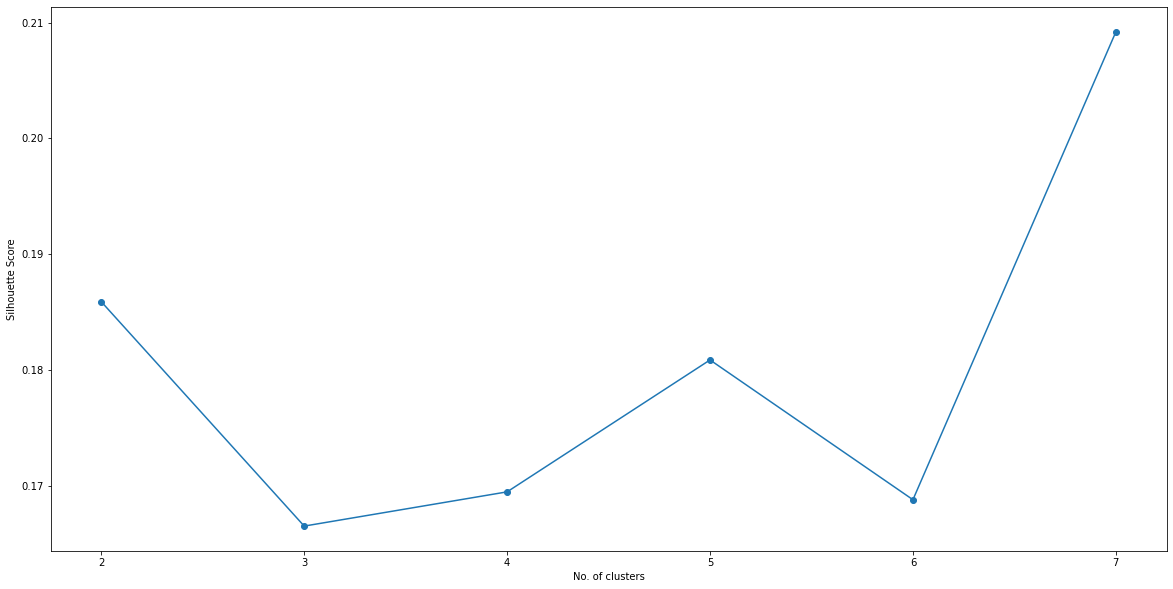

In [21]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")


## Doing K-Means Clustering

In [22]:
# set number of clusters
kclusters = 7
stuttgart_grouped_clustering = stuttgart_grouped.drop(['Name'],1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stuttgart_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([6, 2, 0, 0, 3, 4, 3, 4, 6, 4])

In [23]:
neighborhoods_venues_sorted.insert(0,'Cluster Labels',kmeans.labels_)
neighborhoods_venues_sorted

,Cluster Labels,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6,Bad Cannstatt,Park,Café,Zoo Exhibit,Hotel,German Restaurant,Restaurant,Pool,Italian Restaurant,Beer Garden,Taverna
1,2,Birkach,Metro Station,Hotel,Italian Restaurant,German Restaurant,Garden,Office,Restaurant,Coffee Shop,Climbing Gym,Chinese Restaurant
2,0,Botnang,Italian Restaurant,Supermarket,Park,Plaza,Café,Gym / Fitness Center,Sushi Restaurant,Mountain,Cable Car,Business Service
3,0,Degerloch,Café,Bar,German Restaurant,Cocktail Bar,Hotel,French Restaurant,Ice Cream Shop,Italian Restaurant,Park,Bakery
4,3,Feuerbach,Italian Restaurant,Bakery,Burger Joint,Greek Restaurant,Chinese Restaurant,Plaza,Supermarket,Beer Garden,Museum,Scenic Lookout
5,4,Hedelfingen,Supermarket,Hotel,German Restaurant,Italian Restaurant,Gym / Fitness Center,Metro Station,Fast Food Restaurant,Concert Hall,Convenience Store,Burger Joint
6,3,Möhringen,Hotel,Supermarket,Italian Restaurant,Gym / Fitness Center,German Restaurant,Bakery,Greek Restaurant,Metro Station,Drugstore,Asian Restaurant
7,4,Mühlhausen,Hotel,Supermarket,Metro Station,German Restaurant,Drugstore,Restaurant,Gym / Fitness Center,Gastropub,Bakery,Fruit & Vegetable Store
8,6,Münster,German Restaurant,Zoo Exhibit,Metro Station,Park,Greek Restaurant,Taverna,Grocery Store,Hotel,German Pop-Up Restaurant,Miscellaneous Shop
9,4,Obertürkheim,German Restaurant,Supermarket,Hotel,Gym / Fitness Center,Italian Restaurant,Fast Food Restaurant,History Museum,Shopping Mall,Lounge,Spa


In [24]:
stuttgart_merged = merged_df

# merge stuttgart_grouped with stuttgart_data to add latitude/longitude for each district
stuttgart_merged = stuttgart_merged.join(neighborhoods_venues_sorted.set_index('Name'), on='Name')
#stuttgart_merged['Cluster Labels'] = stuttgart_merged['Cluster Labels'].astype(int)
stuttgart_merged.head() # check the last columns!

,Number,Name,People,Size,People/Size,Districts,longitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Innerer Stadtbezirk Nr. 1,Stuttgart-Mitte,23.956,3808,6.294,10,9.179800,48.775900,0,Café,Park,Bar,Plaza,Ice Cream Shop,Italian Restaurant,Hotel,Cocktail Bar,Scenic Lookout,Coffee Shop
1,Innerer Stadtbezirk Nr. 2,Stuttgart-Nord,27.629,6815,4.054,11,9.176252,48.796661,0,Café,Plaza,Park,Italian Restaurant,Hotel,Bar,Restaurant,Scenic Lookout,Ice Cream Shop,Concert Hall
2,Innerer Stadtbezirk Nr. 3,Stuttgart-Ost,48.730,9035,5.393,8,9.207365,48.776972,0,Park,Bar,Plaza,Cocktail Bar,Hotel,Italian Restaurant,Café,Ice Cream Shop,Restaurant,Nightclub
3,Innerer Stadtbezirk Nr. 4,Stuttgart-Süd,44.050,9586,4.594,7,9.132492,48.753021,0,Supermarket,Italian Restaurant,German Restaurant,Park,Restaurant,Bakery,Ice Cream Shop,Bar,Thai Restaurant,Plaza
4,Innerer Stadtbezirk Nr. 5,Stuttgart-West,52.668,18643,2.825,9,9.151351,48.777659,0,Café,Plaza,Ice Cream Shop,Italian Restaurant,Park,Sushi Restaurant,Bar,Cocktail Bar,Coffee Shop,Hotel


## Visualize Clusters

In [25]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[mainlocation.latitude, mainlocation.longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stuttgart_merged['latitude'], stuttgart_merged['longitude'], stuttgart_merged['Name'], stuttgart_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [26]:
stuttgart_merged

,Number,Name,People,Size,People/Size,Districts,longitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Innerer Stadtbezirk Nr. 1,Stuttgart-Mitte,23.956,3808,6.294,10,9.179800,48.775900,0,Café,Park,Bar,Plaza,Ice Cream Shop,Italian Restaurant,Hotel,Cocktail Bar,Scenic Lookout,Coffee Shop
1,Innerer Stadtbezirk Nr. 2,Stuttgart-Nord,27.629,6815,4.054,11,9.176252,48.796661,0,Café,Plaza,Park,Italian Restaurant,Hotel,Bar,Restaurant,Scenic Lookout,Ice Cream Shop,Concert Hall
2,Innerer Stadtbezirk Nr. 3,Stuttgart-Ost,48.730,9035,5.393,8,9.207365,48.776972,0,Park,Bar,Plaza,Cocktail Bar,Hotel,Italian Restaurant,Café,Ice Cream Shop,Restaurant,Nightclub
3,Innerer Stadtbezirk Nr. 4,Stuttgart-Süd,44.050,9586,4.594,7,9.132492,48.753021,0,Supermarket,Italian Restaurant,German Restaurant,Park,Restaurant,Bakery,Ice Cream Shop,Bar,Thai Restaurant,Plaza
4,Innerer Stadtbezirk Nr. 5,Stuttgart-West,52.668,18643,2.825,9,9.151351,48.777659,0,Café,Plaza,Ice Cream Shop,Italian Restaurant,Park,Sushi Restaurant,Bar,Cocktail Bar,Coffee Shop,Hotel
5,Äußerer Stadtbezirk Nr. 1,Bad Cannstatt,71.285,15713,4.537,18,9.214680,48.804883,6,Park,Café,Zoo Exhibit,Hotel,German Restaurant,Restaurant,Pool,Italian Restaurant,Beer Garden,Taverna
6,Äußerer Stadtbezirk Nr. 2,Birkach,7.149,3089,2.383,3,9.203406,48.728574,2,Metro Station,Hotel,Italian Restaurant,German Restaurant,Garden,Office,Restaurant,Coffee Shop,Climbing Gym,Chinese Restaurant
7,Äußerer Stadtbezirk Nr. 3,Botnang,13.165,2135,6.166,4,9.129532,48.778495,0,Italian Restaurant,Supermarket,Park,Plaza,Café,Gym / Fitness Center,Sushi Restaurant,Mountain,Cable Car,Business Service
8,Äußerer Stadtbezirk Nr. 4,Degerloch,16.686,8021,2.081,5,9.170345,48.749597,0,Café,Bar,German Restaurant,Cocktail Bar,Hotel,French Restaurant,Ice Cream Shop,Italian Restaurant,Park,Bakery
9,Äußerer Stadtbezirk Nr. 5,Feuerbach,30.417,11554,2.645,8,9.159031,48.812305,3,Italian Restaurant,Bakery,Burger Joint,Greek Restaurant,Chinese Restaurant,Plaza,Supermarket,Beer Garden,Museum,Scenic Lookout


# Result Clusters

### Urban option with cafes and parks bars and plazas around

In [27]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==0]

,Cluster Labels,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,0,Botnang,Italian Restaurant,Supermarket,Park,Plaza,Café,Gym / Fitness Center,Sushi Restaurant,Mountain,Cable Car,Business Service
3,0,Degerloch,Café,Bar,German Restaurant,Cocktail Bar,Hotel,French Restaurant,Ice Cream Shop,Italian Restaurant,Park,Bakery
13,0,Stuttgart-Mitte,Café,Park,Bar,Plaza,Ice Cream Shop,Italian Restaurant,Hotel,Cocktail Bar,Scenic Lookout,Coffee Shop
14,0,Stuttgart-Nord,Café,Plaza,Park,Italian Restaurant,Hotel,Bar,Restaurant,Scenic Lookout,Ice Cream Shop,Concert Hall
15,0,Stuttgart-Ost,Park,Bar,Plaza,Cocktail Bar,Hotel,Italian Restaurant,Café,Ice Cream Shop,Restaurant,Nightclub
16,0,Stuttgart-Süd,Supermarket,Italian Restaurant,German Restaurant,Park,Restaurant,Bakery,Ice Cream Shop,Bar,Thai Restaurant,Plaza
17,0,Stuttgart-West,Café,Plaza,Ice Cream Shop,Italian Restaurant,Park,Sushi Restaurant,Bar,Cocktail Bar,Coffee Shop,Hotel


In [28]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==1]

,Cluster Labels,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,1,Untertürkheim,German Restaurant,Hotel,Soccer Field,Greek Restaurant,Fast Food Restaurant,Stadium,Restaurant,Supermarket,Pool,Concert Hall
20,1,Wangen,German Restaurant,Hotel,Supermarket,Bakery,Restaurant,Museum,Fast Food Restaurant,Lounge,Soccer Field,Pool


In [29]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==2]

,Cluster Labels,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,2,Birkach,Metro Station,Hotel,Italian Restaurant,German Restaurant,Garden,Office,Restaurant,Coffee Shop,Climbing Gym,Chinese Restaurant
11,2,Sillenbuch,Italian Restaurant,Metro Station,Supermarket,Hotel,Soccer Field,German Restaurant,Bakery,Music Venue,Climbing Gym,Middle Eastern Restaurant


In [30]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==3]

,Cluster Labels,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,3,Feuerbach,Italian Restaurant,Bakery,Burger Joint,Greek Restaurant,Chinese Restaurant,Plaza,Supermarket,Beer Garden,Museum,Scenic Lookout
6,3,Möhringen,Hotel,Supermarket,Italian Restaurant,Gym / Fitness Center,German Restaurant,Bakery,Greek Restaurant,Metro Station,Drugstore,Asian Restaurant
12,3,Stammheim,Hotel,Supermarket,Metro Station,Bakery,Drugstore,Burger Joint,Coffee Shop,Garden Center,Italian Restaurant,Chinese Restaurant
19,3,Vaihingen,German Restaurant,Hotel,Bakery,Asian Restaurant,Italian Restaurant,Indian Restaurant,Gastropub,Restaurant,Sandwich Place,Supermarket
22,3,Zuffenhausen,Drugstore,Bakery,Burger Joint,Italian Restaurant,Chinese Restaurant,German Restaurant,Hotel,Greek Restaurant,Plaza,Pet Store


In [31]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==4]

,Cluster Labels,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,4,Hedelfingen,Supermarket,Hotel,German Restaurant,Italian Restaurant,Gym / Fitness Center,Metro Station,Fast Food Restaurant,Concert Hall,Convenience Store,Burger Joint
7,4,Mühlhausen,Hotel,Supermarket,Metro Station,German Restaurant,Drugstore,Restaurant,Gym / Fitness Center,Gastropub,Bakery,Fruit & Vegetable Store
9,4,Obertürkheim,German Restaurant,Supermarket,Hotel,Gym / Fitness Center,Italian Restaurant,Fast Food Restaurant,History Museum,Shopping Mall,Lounge,Spa
10,4,Plieningen,Hotel,Supermarket,German Restaurant,Airport Service,Italian Restaurant,Theater,Café,Garden,Multiplex,Electronics Store


In [32]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==5]

,Cluster Labels,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,5,Weilimdorf,Supermarket,Bakery,Italian Restaurant,Drugstore,Metro Station,Mobile Phone Shop,Big Box Store,Bowling Alley,Shopping Mall,Discount Store


### Family friendly option because of zoos parks and suburban area

In [33]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels']==6]

,Cluster Labels,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6,Bad Cannstatt,Park,Café,Zoo Exhibit,Hotel,German Restaurant,Restaurant,Pool,Italian Restaurant,Beer Garden,Taverna
8,6,Münster,German Restaurant,Zoo Exhibit,Metro Station,Park,Greek Restaurant,Taverna,Grocery Store,Hotel,German Pop-Up Restaurant,Miscellaneous Shop
